Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.6562 - loss: 0.9529
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8402 - loss: 0.4486
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8671 - loss: 0.3731
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8854 - loss: 0.3325
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8952 - loss: 0.2979
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9032 - loss: 0.2731
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9091 - loss: 0.2548
Epoch 8/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9122 - loss: 0.2436
Epoch 9/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9178 - loss: 0.2319
Epoch 10/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9202 - loss: 0.2178
Epoch 11/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9285 - loss: 0.1976
Epoch 12/12
938/938 ━━━━━━━━━━

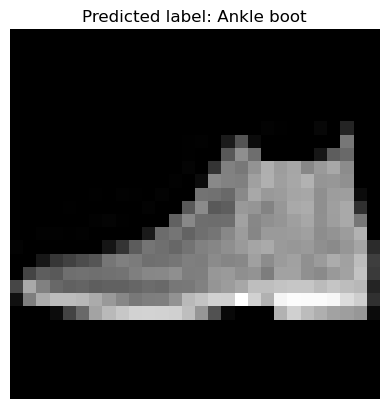

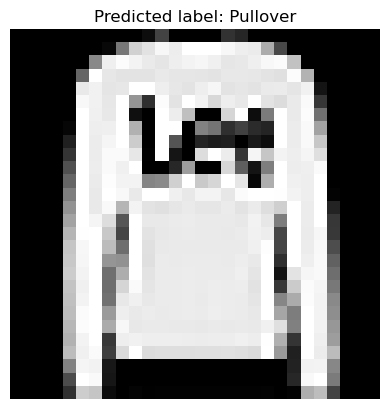

In [11]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Input
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

try:
    # Load Fashion MNIST dataset
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
except Exception as e:
    print(f"Error loading the dataset: {e}")
    exit()

# Check for missing values
if np.any(np.isnan(train_images)) or np.any(np.isnan(test_images)):
    print("Dataset contains missing values.")
    exit()

# Check for duplicates
if len(np.unique(train_images, axis=0)) != len(train_images):
    print("Duplicates found in the dataset.")

# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to include a channel dimension (grayscale, 1 channel)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Define the class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Build the CNN model
model = Sequential([
    Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=12, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.2f}")

# Make predictions for two test images
predictions = model.predict(test_images[:2])

# Show the first two images and their predicted labels
for i in range(2):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted label: {class_names[np.argmax(predictions[i])]}") 
    plt.axis('off')
    plt.show()